Exercise 2.3: The Gray-Scott model - A reaction-diffusion system

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [59]:
#Define some of the parameters:
D_u = 0.16
D_v = 0.08
f = 0.035
#f = 0.0035
k = 0.060
#k = 0.60
delta_x = 1
delta_t = 1

N = 100 #size of the grid

In [18]:
#Define D_u^* and D_v^* the same way as in tyhe slides (this is for clarity)

def D_u_star(i,j,uu):
    D_u_starr = D_u*(uu[i,(j+1)%(N+1)] + uu[i,(j-1)%(N+1)] + uu[(i+1)%(N+1),j] + uu[(i-1)%(N+1),j] - 4*uu[i,j])/(delta_x**2)
    return(D_u_starr)

def D_v_star(i,j,vv):
    D_v_starr = D_v*(vv[i,(j+1)%(N+1)] + vv[i,(j-1)%(N+1)] + vv[(i+1)%(N+1),j] + vv[(i-1)%(N+1),j] - 4*vv[i,j])/(delta_x**2)
    return(D_v_starr)

In [60]:
def system_at_time(t):
    u_old = np.zeros((N+1,N+1))
    u_old[:,:] = 0.5
    v_old = np.zeros((N+1,N+1))
    v_old[50,50] = 0.25

    u_new = u_old.copy()
    v_new = v_old.copy()

    theta = 0

    while theta<t:
        for i in range(N+1):
            for j in range(N+1):
                u_new[i,j] = u_old[i,j] + delta_t*(D_u_star(i,j,u_old) - u_old[i,j]*v_old[i,j]*v_old[i,j] + f*(1-u_old[i,j]))
                v_new[i,j] = v_old[i,j] + delta_t*(D_v_star(i,j,v_old) + u_old[i,j]*v_old[i,j]*v_old[i,j] - (f+k)*v_old[i,j])
        theta += delta_t
        u_old = u_new.copy()
        v_old = v_new.copy()
    
    return u_new,v_new

In [61]:
system_1000 = system_at_time(1000)

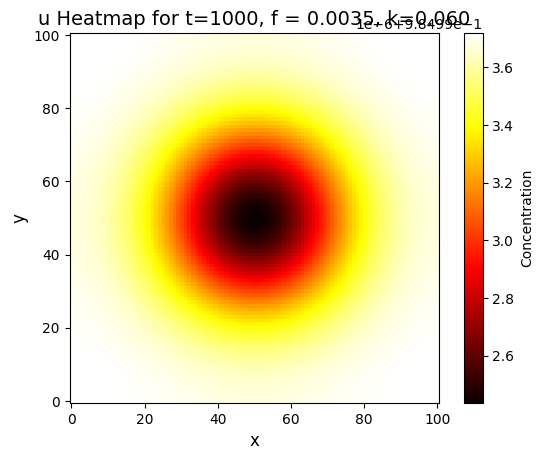

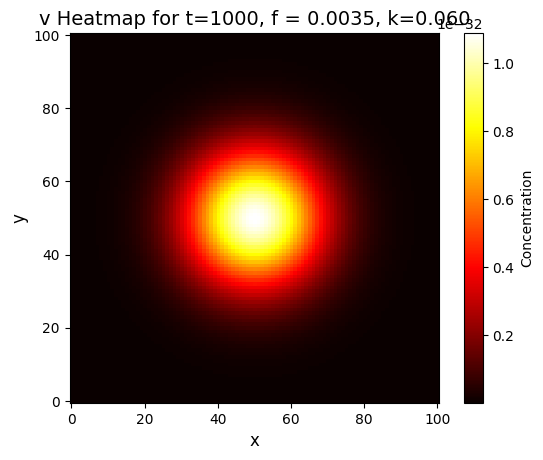

In [ ]:
#f=0.0035

plt.imshow(system_1000[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('u Heatmap for t=1000, f = 0.0035, k=0.060',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(system_1000[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('v Heatmap for t=1000, f = 0.0035, k=0.060',size=14)
plt.colorbar(label='Concentration')
plt.show()

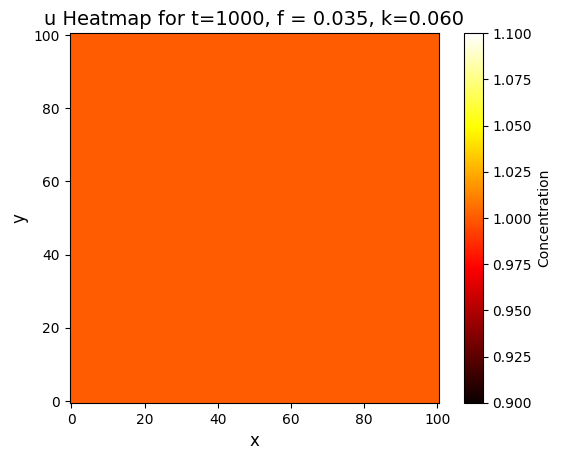

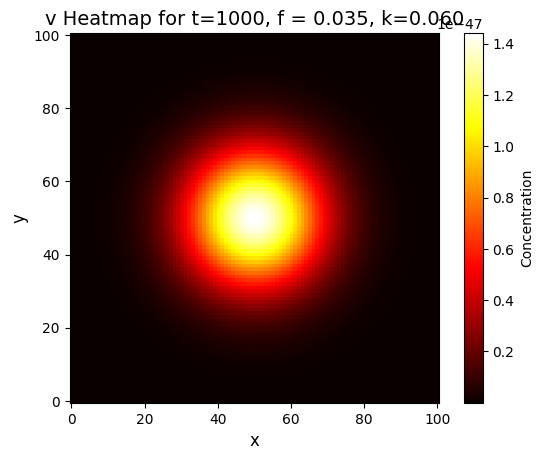

In [62]:
#f=0.035

plt.imshow(system_1000[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('u Heatmap for t=1000, f = 0.035, k=0.060',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(system_1000[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('v Heatmap for t=1000, f = 0.035, k=0.060',size=14)
plt.colorbar(label='Concentration')
plt.show()